# Hierarchical Binomial Model

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
yes_cycles = [16, 9, 10, 13, 19, 20, 18, 17, 35, 55]
yes_others = [58, 90, 48, 57, 103, 57, 86, 112, 273, 64]
yes_total = [a + b for a, b in zip(yes_cycles, yes_others)]
yes_props = [a / b for a, b in zip(yes_cycles, yes_total)]

no_cycles = [12, 1, 2, 4, 9, 7, 9, 8]
no_others = [113, 18, 14, 44, 208, 67, 29, 154]
no_total = [a + b for a, b in zip(no_cycles, no_others)]
no_props = [a / b for a, b in zip(no_cycles, no_total)]

Details:
- $y_j$ = number of bicycles at location $j$
- $\theta_j$ = probability of traffic that is bicycles at location $j$

Model:
$$
\begin{align}
p(\alpha, \beta) & \propto (\alpha + \beta)^{-5/2} \\ 
\theta_j & \sim \text{Beta}(\alpha, \beta) \\ 
y_j & \sim \text{Binomial}(n_j, \theta_j)
\end{align}
$$

In [13]:
coords = {"bike_route": ["Yes", "No"]}

with pm.Model(coords=coords) as m:
    u = pm.Uniform("u", lower=0, upper=1)
    v = pm.Uniform("v", lower=0, upper=1)

    alpha = pm.Deterministic("alpha", pm.math.exp(v + u) / (1 + pm.math.exp(u)))
    beta = pm.Deterministic("beta", pm.math.exp(v) / (1 + pm.math.exp(u)))

    thetas = pm.Beta("theta", alpha=alpha, beta=beta, dims="bike_route")
    pm.Deterministic("diff", thetas[0] - thetas[1])

    pm.Binomial(
        "yes_counts",
        n=yes_total,
        p=thetas[0],
        observed=yes_cycles,
    )

    pm.Binomial(
        "no_counts",
        n=no_total,
        p=thetas[1],
        observed=no_cycles,
    )

    trace = pm.sample(2000, tune=1000)
    prior = pm.sample_prior_predictive(1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [u, v, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
Sampling: [no_counts, theta, u, v, yes_counts]


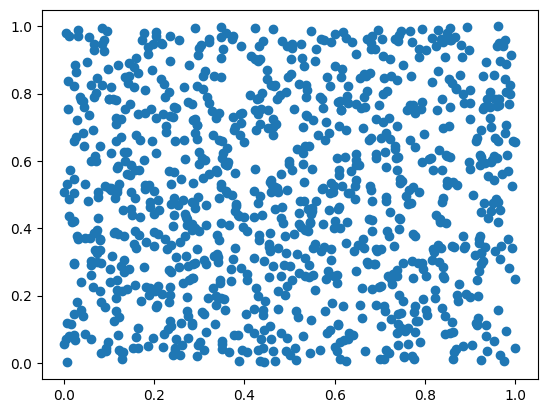

In [15]:
plt.scatter(prior.prior["u"].mean("chain"), prior.prior["v"].mean("chain"))
plt.show()

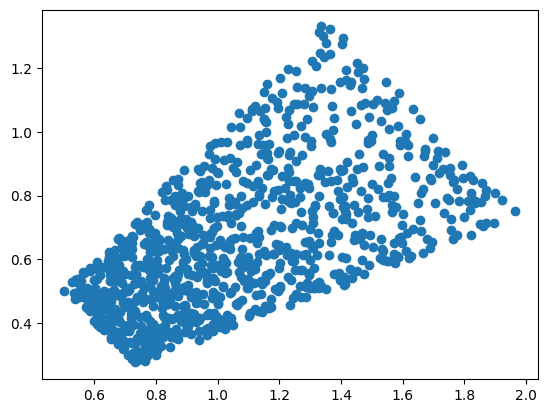

In [16]:
plt.scatter(prior.prior["alpha"].mean("chain"), prior.prior["beta"].mean("chain"))
plt.show()

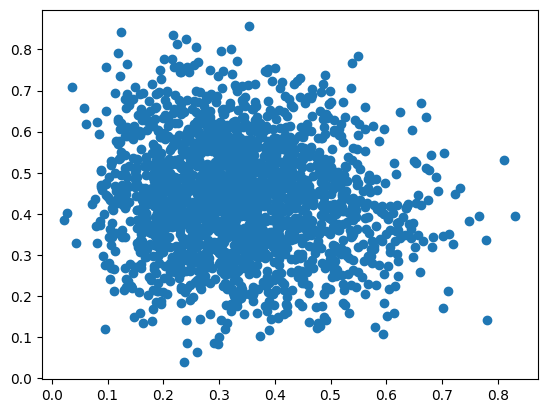

In [17]:
posterior = trace.posterior

plt.scatter(posterior["u"].mean("chain"), posterior["v"].mean("chain"))
plt.show()

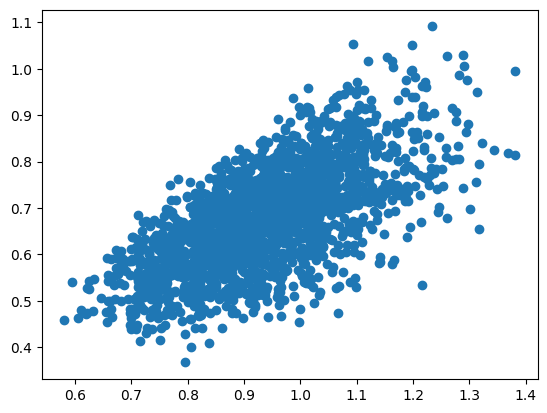

In [18]:
plt.scatter(posterior["alpha"].mean("chain"), posterior["beta"].mean("chain"))
plt.show()